In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('OiDj_merged.csv')
# mode = 0 - road; mode = 1 - Bus; mode = 2 - Rail
dafni_impacts_enriched_df = df[df['net_mode'] == 1]

# # Feature Selection
# features = dafni_impacts_enriched_df[['Oi_net_i', 'Dj_net_i', 'Oi_net_j', 'Dj_net_j', 'net_secs']].values
# target = dafni_impacts_enriched_df['CkDiffRoad'].values

# # Data Normalization
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features)

# # Splitting the dataset
# X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

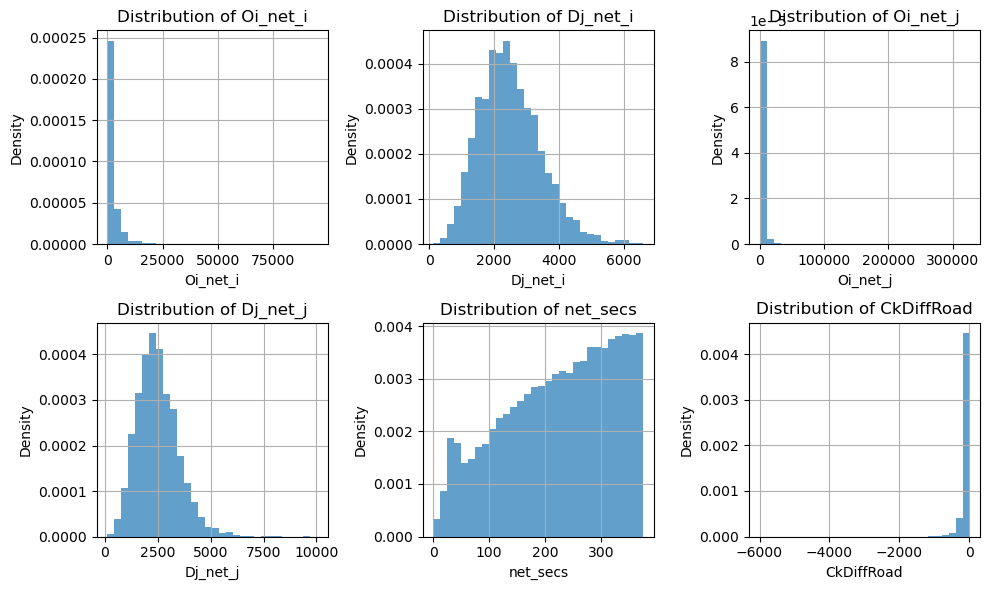

Skewness of the features:
Oi_net_i       9.215797
Dj_net_i       0.618175
Oi_net_j      16.855407
Dj_net_j       0.742135
net_secs      -0.354788
CkDiffRoad   -15.622026
dtype: float64


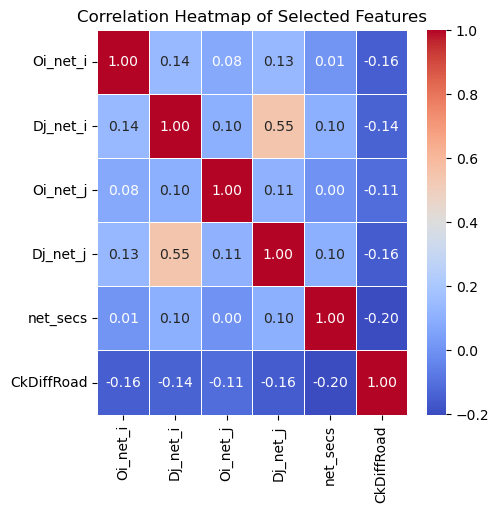

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.flatten() 

# Plotting histograms for each feature
columns = ['Oi_net_i', 'Dj_net_i', 'Oi_net_j', 'Dj_net_j', 'net_secs','CkDiffRoad']
for i, column in enumerate(columns):
    row = i // 3 
    col = i % 3
    axs[i].hist(dafni_impacts_enriched_df[column], density=True, bins=30, alpha=0.7)
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_ylabel('Density')
    axs[i].set_xlabel(column)
    axs[i].grid(True)

# axs[-1].axis('off')

plt.tight_layout()
plt.show()

# Check the skewness
print("Skewness of the features:")
print(dafni_impacts_enriched_df[columns].skew())

# Heat map of correlation between features
selected_features = dafni_impacts_enriched_df[columns]
corr_matrix = selected_features.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()



C:\Users\Xinyi Liu\AppData\Local\Temp\ipykernel_7372\2092031270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dafni_impacts_enriched_df[f'{var}_z'] = (dafni_impacts_enriched_df[var] - mean) / std
C:\Users\Xinyi Liu\AppData\Local\Temp\ipykernel_7372\2092031270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dafni_impacts_enriched_df[f'{var}_z'] = (dafni_impacts_enriched_df[var] - mean) / std
C:\Users\Xinyi Liu\AppData\Local\Temp\ipykernel_7372\2092031270.py:11: SettingWithCopyWarning: 
A value is

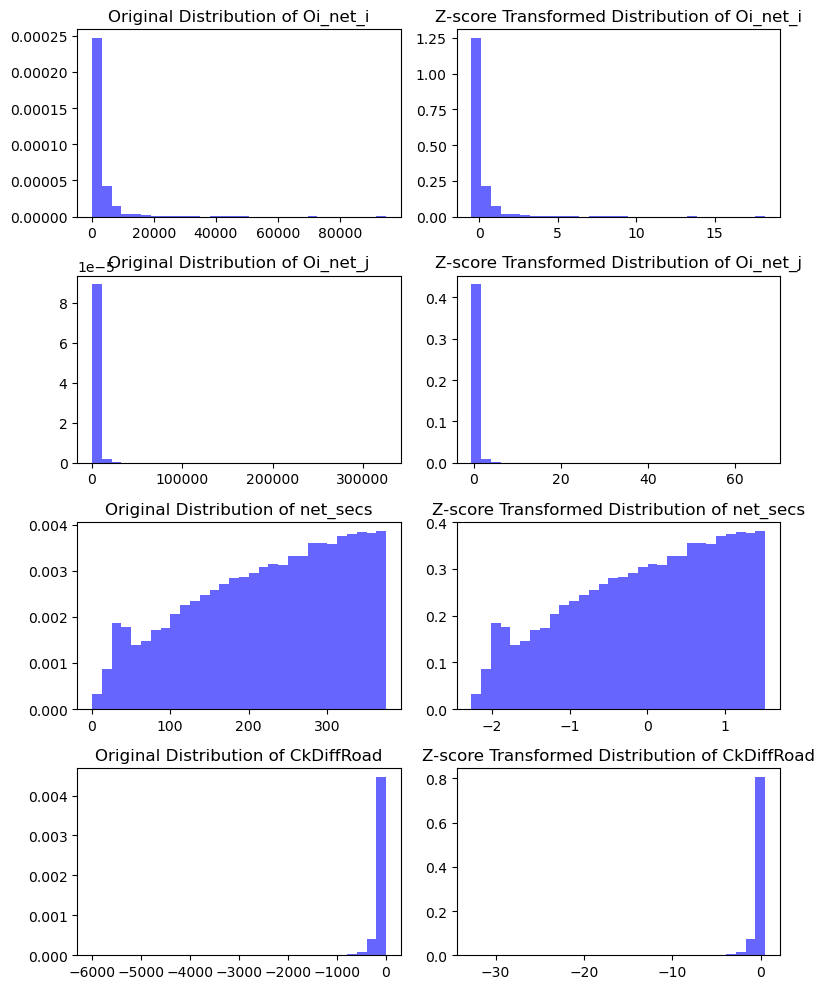

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 应用Z-score标准化
variables = ['Oi_net_i', 'Oi_net_j', 'net_secs', 'CkDiffRoad']
for var in variables:
    mean = dafni_impacts_enriched_df[var].mean()
    std = dafni_impacts_enriched_df[var].std()
    dafni_impacts_enriched_df[f'{var}_z'] = (dafni_impacts_enriched_df[var] - mean) / std

# 绘图
fig, axs = plt.subplots(4, 2, figsize=(8, 10))

for i, var in enumerate(variables):
    axs[i, 0].hist(dafni_impacts_enriched_df[var], bins=30, density=True, alpha=0.6, color='blue')
    axs[i, 0].set_title(f'Original Distribution of {var}')
    
    axs[i, 1].hist(dafni_impacts_enriched_df[f'{var}_z'], bins=30, density=True, alpha=0.6, color='blue')
    axs[i, 1].set_title(f'Z-score Transformed Distribution of {var}')

plt.tight_layout()
plt.show()


C:\Users\Xinyi Liu\AppData\Local\Temp\ipykernel_7372\1264259038.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dafni_impacts_enriched_df['Oi_net_i_log'] = np.log1p(dafni_impacts_enriched_df['Oi_net_i'])
C:\Users\Xinyi Liu\AppData\Local\Temp\ipykernel_7372\1264259038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dafni_impacts_enriched_df['Oi_net_j_log'] = np.log1p(dafni_impacts_enriched_df['Oi_net_j'])
C:\Users\Xinyi Liu\AppData\Local\Temp\ipykernel_7372\1264259038.py:8: SettingWithCopyWarning: 
A

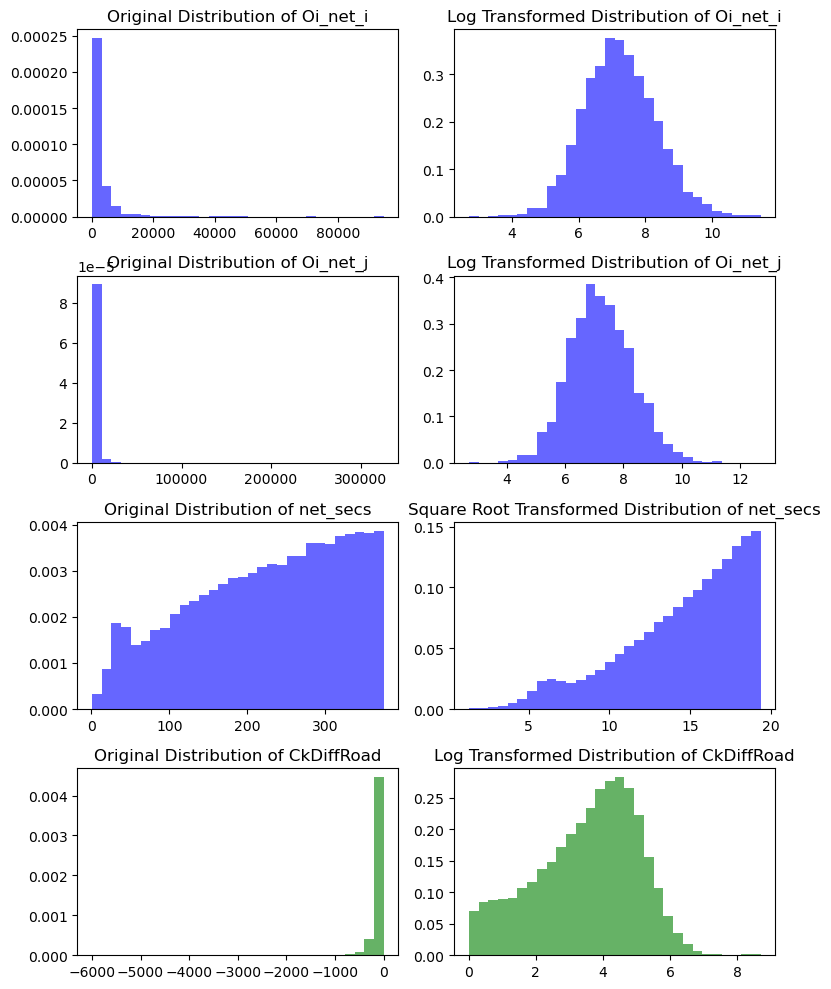

In [16]:
import numpy as np

# Apply logarithmic conversion to correct for positive skewness
dafni_impacts_enriched_df['Oi_net_i_log'] = np.log1p(dafni_impacts_enriched_df['Oi_net_i'])
dafni_impacts_enriched_df['Oi_net_j_log'] = np.log1p(dafni_impacts_enriched_df['Oi_net_j'])

# Apply square root conversion to correct for negative bias (ensure no zero values)
dafni_impacts_enriched_df['net_secs_sqrt'] = np.sqrt(dafni_impacts_enriched_df['net_secs'] + 1) # Add 1 to avoid taking the square root of 0

#### correction for target
dafni_impacts_enriched_df['CkDiffRoad_log'] = np.log1p(abs(dafni_impacts_enriched_df['CkDiffRoad']))


fig, axs = plt.subplots(4, 2, figsize=(8, 10)) 

# Oi_net_i 
axs[0, 0].hist(dafni_impacts_enriched_df['Oi_net_i'], bins=30, density=True, alpha=0.6, color='blue')
axs[0, 0].set_title('Original Distribution of Oi_net_i')
axs[0, 1].hist(dafni_impacts_enriched_df['Oi_net_i_log'], bins=30, density=True, alpha=0.6, color='blue')
axs[0, 1].set_title('Log Transformed Distribution of Oi_net_i')

# Oi_net_j 
axs[1, 0].hist(dafni_impacts_enriched_df['Oi_net_j'], bins=30, density=True, alpha=0.6, color='blue')
axs[1, 0].set_title('Original Distribution of Oi_net_j')
axs[1, 1].hist(dafni_impacts_enriched_df['Oi_net_j_log'], bins=30, density=True, alpha=0.6, color='blue')
axs[1, 1].set_title('Log Transformed Distribution of Oi_net_j')

# net_secs 
axs[2, 0].hist(dafni_impacts_enriched_df['net_secs'], bins=30, density=True, alpha=0.6, color='blue')
axs[2, 0].set_title('Original Distribution of net_secs')
axs[2, 1].hist(dafni_impacts_enriched_df['net_secs_sqrt'], bins=30, density=True, alpha=0.6, color='blue')
axs[2, 1].set_title('Square Root Transformed Distribution of net_secs')

# CkDiffRoad 
axs[3, 0].hist(dafni_impacts_enriched_df['CkDiffRoad'], bins=30, density=True, alpha=0.6, color='green')
axs[3, 0].set_title('Original Distribution of CkDiffRoad')
axs[3, 1].hist(dafni_impacts_enriched_df['CkDiffRoad_log'], bins=30, density=True, alpha=0.6, color='green')
axs[3, 1].set_title('Log Transformed Distribution of CkDiffRoad')

plt.tight_layout()
plt.show()


In [17]:
dafni_impacts_enriched_df

,Unnamed: 0,idx,Ck1Road,Ck1Bus,Ck1Rail,Ck2Road,Ck2Bus,Ck2Rail,CkDiffRoad,CkDiffBus,...,Dj_rail_y,Dj_net_j,Oi_net_i_z,Oi_net_j_z,net_secs_z,CkDiffRoad_z,Oi_net_i_log,Oi_net_j_log,net_secs_sqrt,CkDiffRoad_log
11,11,0,7.875351e+06,3.020828e+06,9.164254e+06,7.875009e+06,3.021510e+06,9.163915e+06,-342.085727,681.747905,...,2312.028856,4663.784411,-0.257561,-0.354710,0.764605,-1.424164,7.216709,6.773080,17.350048,5.837980
12,12,1,7.875351e+06,3.020828e+06,9.164254e+06,7.875335e+06,3.020861e+06,9.164238e+06,-15.976562,32.559536,...,954.637839,2091.354476,-0.257561,-0.359469,1.265951,0.382540,7.216709,6.746412,18.721967,2.831834
13,13,2,7.875351e+06,3.020828e+06,9.164254e+06,7.875181e+06,3.021178e+06,9.164076e+06,-170.814017,349.219270,...,1518.419257,3212.101318,-0.257561,-0.401055,0.966435,-0.475288,7.216709,6.476972,17.914990,5.146413
14,14,3,7.875351e+06,3.020828e+06,9.164254e+06,7.875331e+06,3.020869e+06,9.164234e+06,-20.325613,40.510179,...,945.042297,2258.952016,-0.257561,0.384739,1.406324,0.358445,7.216709,8.400210,19.088434,3.059909
15,15,4,7.875351e+06,3.020828e+06,9.164254e+06,7.875317e+06,3.020897e+06,9.164220e+06,-34.551981,69.016654,...,1166.584045,2705.498503,-0.257561,1.563429,0.327684,0.279629,7.216709,9.224736,16.059133,3.570996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112321,112321,22310,7.875351e+06,3.020828e+06,9.164254e+06,7.875334e+06,3.020870e+06,9.164230e+06,-17.701103,41.413197,...,445.938173,955.151573,-0.180921,-0.510711,0.790623,0.372986,7.467371,4.787492,17.423905,2.928583
112322,112322,22311,7.875351e+06,3.020828e+06,9.164254e+06,7.875332e+06,3.020874e+06,9.164229e+06,-19.591422,45.241820,...,363.097407,798.358257,-0.180921,-0.387814,0.722796,0.362513,7.467371,6.570883,17.230707,3.024875
112323,112323,22312,7.875351e+06,3.020828e+06,9.164254e+06,7.875350e+06,3.020832e+06,9.164252e+06,-1.255922,3.144315,...,1088.081473,2064.555369,-0.180921,-0.417607,-2.009546,0.464095,7.467371,6.345636,5.214181,0.813559
112324,112324,22313,7.875351e+06,3.020828e+06,9.164254e+06,7.875342e+06,3.020850e+06,9.164241e+06,-9.032729,21.928624,...,886.683757,1676.231512,-0.180921,-0.467676,-0.931433,0.421010,7.467371,5.793014,11.558904,2.305853


In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select feature columns for PCA
pca_features = ['Oi_net_i_log', 'Oi_net_j_log', 'Dj_net_i', 'Dj_net_j', 'net_secs_sqrt']

# standardized
scaler = StandardScaler()
features_scaled = scaler.fit_transform(dafni_impacts_enriched_df[pca_features])

# # Initialise the PCA 
# pca = PCA(n_components=5) 
# Explained variance ratio: [0.367677   0.20138951 0.19177514 0.16976602 0.06939232]

pca = PCA(n_components=4) 

# fitting PCA
pca_result = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=pca_result)

# Explained variance ratios
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.37068609 0.20313961 0.17314904 0.16621425]


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# target
target = dafni_impacts_enriched_df['CkDiffRoad_log'].values

# # option 1:Using PCA features as input features
# features_pca = pca_df.values  
# X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)


# option2: use unskewed features
features = dafni_impacts_enriched_df[pca_features]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# # Data standardisation
# scaler = StandardScaler()
# X_train= scaler.fit_transform(X_train)
# X_test= scaler.transform(X_test)


from sklearn.preprocessing import MinMaxScaler
# Data normalisation - scaling data to between 0 and 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Model Creation Function
def createNetwork(num_inputs, neurons_per_layer, activations, kernel_initializers, dropout_rates):
    model = Sequential()
    model.add(Dense(neurons_per_layer[0], input_dim=num_inputs, activation=activations[0], kernel_initializer=kernel_initializers[0]))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rates[0]))
    for i in range(1, len(neurons_per_layer)):
        model.add(Dense(neurons_per_layer[i], activation=activations[i], kernel_initializer=kernel_initializers[i]))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rates[i]))
    model.add(Dense(1, activation='linear'))  # Assuming a regression problem
    optimizer = Adam(learning_rate=0.001)  
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])
    return model


In [21]:
import datetime
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Append Experiment Results with Additional Model Configurations
def append_experiment_results(model_config, performance, file_path='TrainingLog/model_performance_summary.csv'):
    if not os.path.isfile(file_path):
        df = pd.DataFrame(columns=list(model_config.keys()) + list(performance.keys()))
        df.to_csv(file_path, index=False)
    else:
        results_df = pd.DataFrame([{**model_config, **performance}])
        results_df.to_csv(file_path, mode='a', header=False, index=False)
    print(f'Results appended to {file_path}')

# Train Model Function
def trainModel(model, X_train, y_train, X_test, y_test, epochs, batchSize, val_split, model_config):
    timestamp = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    training_log_filename = f'TrainingLog/training_log_{timestamp}.csv'
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
        ModelCheckpoint('model_best.h5', monitor='val_loss', save_best_only=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1),
        CSVLogger(training_log_filename)
    ]
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batchSize, validation_split=val_split, verbose=1, callbacks=callbacks)
    y_pred = model.predict(X_test)
    performance = {'mse': mean_squared_error(y_test, y_pred), 'mae': mean_absolute_error(y_test, y_pred), 'r2': r2_score(y_test, y_pred)}
    append_experiment_results(model_config, performance)
    return history, performance

In [22]:
# Customizable model parameters
neurons_per_layer = [256, 256, 256, 256]  
activations = ['sigmoid', 'sigmoid', 'sigmoid','sigmoid']  
kernel_initializers = ['glorot_uniform', 'glorot_uniform', 'glorot_uniform', 'glorot_uniform']  
dropout_rates = [0.1, 0.1, 0.1,0.1]  
model_params = {'epochs': 1000, 'batchSize': 64}
model_config = {
    'model_layers': len(neurons_per_layer),
    'neurons_per_layer': neurons_per_layer,
    'activations': activations,
    'kernel_initializers': kernel_initializers,
    'dropout_rates': dropout_rates,
    'optimizer': 'adam'
}

In [23]:
# Train the model
model = createNetwork(num_inputs=X_train.shape[1], neurons_per_layer=neurons_per_layer, activations=activations, kernel_initializers=kernel_initializers, dropout_rates=dropout_rates)
history, performance = trainModel(model, X_train, y_train, X_test, y_test, model_params['epochs'], model_params['batchSize'], 0.2, model_config)


Epoch 1/1000
1116/1124 [============================>.] - ETA: 0s - loss: 2.5045 - mae: 1.2237 - mse: 2.5045
Epoch 1: val_loss improved from inf to 1.49211, saving model to model_best.h5
1124/1124 [==============================] - 5s 4ms/step - loss: 2.5001 - mae: 1.2227 - mse: 2.5001 - val_loss: 1.4921 - val_mae: 0.9669 - val_mse: 1.4921 - lr: 0.0010
Epoch 2/1000
1117/1124 [============================>.] - ETA: 0s - loss: 1.6234 - mae: 1.0131 - mse: 1.6234
Epoch 2: val_loss improved from 1.49211 to 1.47131, saving model to model_best.h5
1124/1124 [==============================] - 4s 4ms/step - loss: 1.6238 - mae: 1.0132 - mse: 1.6238 - val_loss: 1.4713 - val_mae: 0.9531 - val_mse: 1.4713 - lr: 0.0010
Epoch 3/1000
1108/1124 [============================>.] - ETA: 0s - loss: 1.5445 - mae: 0.9872 - mse: 1.5445
Epoch 3: val_loss improved from 1.47131 to 1.44159, saving model to model_best.h5
1124/1124 [==============================] - 4s 4ms/step - loss: 1.5444 - mae: 0.9871 - mse: 1.

702/702 [==============================] - 1s 1ms/step
Mean Squared Error (MSE) on test data: 1.3336308994890096
Mean Absolute Error (MAE) on test data: 0.9006506150621653
R-squared Score (R2) on test data: 0.4287080393439069
Mean Squared Error (MSE) on original data scale: 29595.56177081199
Mean Absolute Error (MAE) on original data scale: 59.624737286281416


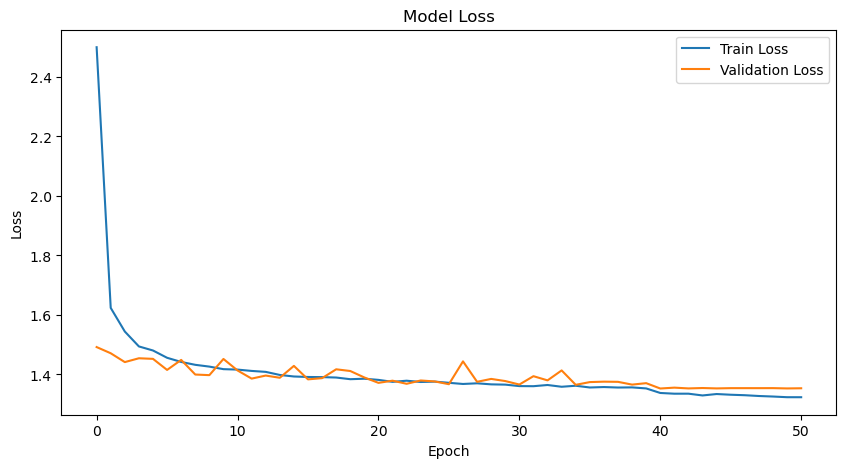

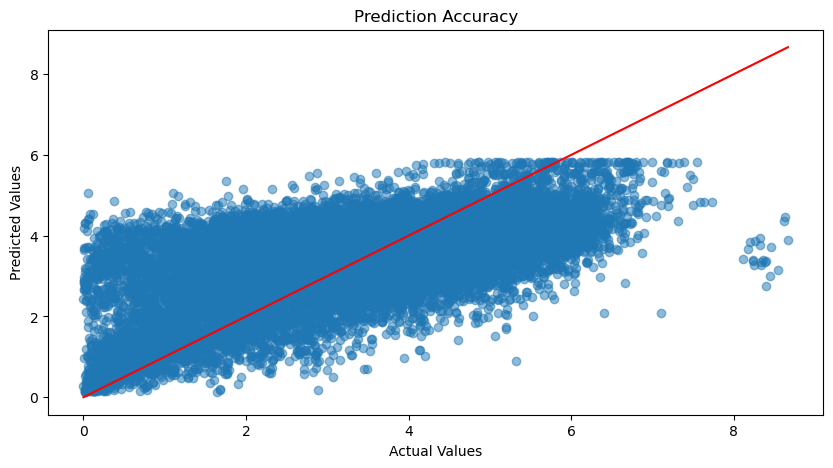

In [24]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Calculated indicators
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE) on test data: {mse}')
print(f'Mean Absolute Error (MAE) on test data: {mae}')
print(f'R-squared Score (R2) on test data: {r2}')

# Inverse logarithmic transformation of predicted values
y_pred_inv_log = np.expm1(y_pred.flatten())  # Flatten in case y_pred has extra dimensions
y_test_inv_log = np.expm1(y_test)

# Calculating MAE and MSE on the original scale
mse_original = mean_squared_error(y_test_inv_log, y_pred_inv_log)
mae_original = mean_absolute_error(y_test_inv_log, y_pred_inv_log)
print(f'Mean Squared Error (MSE) on original data scale: {mse_original}')
print(f'Mean Absolute Error (MAE) on original data scale: {mae_original}')

# Plot Training & Validation Loss Values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plotting Predicted Versus Actual Values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Prediction Accuracy')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction diagonal
plt.show()
